In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [50]:
costData = pd.read_csv('data\costDataRevised.csv')
costData.head()

,Unnamed: 0,disasterNumber,obligationAmount,state,incidentType,declarationTitle,incidentBeginDate,lat,lon,incidentDate,incidentTime
0,0,3345,904490.14,WV,Severe Storms,SEVERE STORMS,2012-06-29T22:30:00.000Z,39.453524,-78.039552,2012-06-29,22:30:00.000Z
1,1,3346,842464.67,OH,Severe Storms,SEVERE STORMS,2012-06-29T22:00:00.000Z,38.839894,-83.505170,2012-06-29,22:00:00.000Z
2,2,3347,1409793.92,LA,Hurricane,TROPICAL STORM ISAAC,2012-08-26T00:00:00.000Z,30.211644,-90.918610,2012-08-26,00:00:00.000Z
3,3,3348,253189.73,MS,Hurricane,TROPICAL STORM ISAAC,2012-08-26T00:00:00.000Z,33.077787,-89.568066,2012-08-26,00:00:00.000Z
4,4,3349,0.00,MD,Hurricane,HURRICANE SANDY,2012-10-26T15:36:00.000Z,38.528853,-76.537764,2012-10-26,15:36:00.000Z


In [65]:
incidentCost = costData[['obligationAmount', 'incidentType']]
#incidentCost.rename(columns={'obligationAmount':'fema_payout'},inplace=True)
pd.set_option('display.float_format', '{:.2f}'.format)
incidentCost['obligationAmount'] = incidentCost['obligationAmount'].astype('float')
incidentCost.head()

,obligationAmount,incidentType
0,904490.14,Severe Storms
1,842464.67,Severe Storms
2,1409793.92,Hurricane
3,253189.73,Hurricane
4,0.00,Hurricane


In [66]:
median = incidentCost['obligationAmount'].median()
print(median)

131394.25


In [67]:
incidentCost['obligationAmount'].describe()


count         325.00
mean      8979445.36
std      55719404.17
min            -0.00
25%         10000.00
50%        131394.25
75%        842464.67
max     749221406.71
Name: obligationAmount, dtype: float64

<AxesSubplot:>

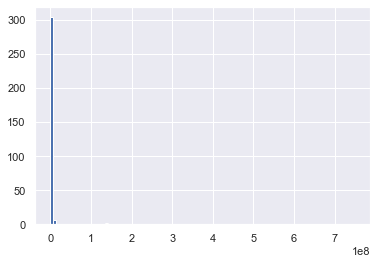

In [68]:
incidentCost['obligationAmount'].hist(bins=100)

In [55]:
incidentCost.dtypes

obligationAmount    float64
incidentType         object
dtype: object

In [5]:
incidentCost.loc[incidentCost['obligationAmount'] > median, 'high_low'] = 'high'
incidentCost.loc[incidentCost['obligationAmount'] < median, 'high_low'] = 'low'

incidentCost.head()

,obligationAmount,incidentType,high_low
0,904490.14,Severe Storms,high
1,842464.67,Severe Storms,high
2,1409793.92,Hurricane,high
3,253189.73,Hurricane,high
4,0.00,Hurricane,low


In [6]:
incidentCost = pd.get_dummies(incidentCost)

incidentCost.head()

,obligationAmount,incidentType_Coastal Storm,incidentType_Earthquake,incidentType_Fire,incidentType_Flood,incidentType_Hurricane,incidentType_Mud/Landslide,incidentType_Severe Ice Storm,incidentType_Severe Storms,incidentType_Snow,incidentType_Tornado,incidentType_Volcano,high_low_high,high_low_low
0,904490.14,0,0,0,0,0,0,0,1,0,0,0,1,0
1,842464.67,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1409793.92,0,0,0,0,1,0,0,0,0,0,0,1,0
3,253189.73,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0.00,0,0,0,0,1,0,0,0,0,0,0,0,1


In [7]:
incidentCost.rename(columns={'incidentType_Coastal Storm': 'coastal_storm',
                            'incidentType_Earthquake':'earthquake',
                            'incidentType_Hurricane':'hurrincane',
                            'incidentType_Fire':'fire',
                            'incidentType_Flood':'flood',
                            'incidentType_Mud/Landslide':'mud_landslide',
                            'incidentType_Severe Ice Storm':'severe_ice_storm',
                            'incidentType_Snow':'snow',
                            'incidentType_Tornado':'tornado',
                            'incidentType_Volcano':'volcano',
                            'incidentType_Severe Storms':'severe_storms',
                            'high_low_high':'high_cost',
                            'high_low_low':'low_cost',
                            'obligationAmount':'fema_payout'},inplace=True)

incidentCost.head()

,fema_payout,coastal_storm,earthquake,fire,flood,hurrincane,mud_landslide,severe_ice_storm,severe_storms,snow,tornado,volcano,high_cost,low_cost
0,904490.14,0,0,0,0,0,0,0,1,0,0,0,1,0
1,842464.67,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1409793.92,0,0,0,0,1,0,0,0,0,0,0,1,0
3,253189.73,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0.00,0,0,0,0,1,0,0,0,0,0,0,0,1


In [8]:
incidentCost.drop(columns='low_cost', axis=1, inplace=True)
incidentCost.head()

,fema_payout,coastal_storm,earthquake,fire,flood,hurrincane,mud_landslide,severe_ice_storm,severe_storms,snow,tornado,volcano,high_cost
0,904490.14,0,0,0,0,0,0,0,1,0,0,0,1
1,842464.67,0,0,0,0,0,0,0,1,0,0,0,1
2,1409793.92,0,0,0,0,1,0,0,0,0,0,0,1
3,253189.73,0,0,0,0,1,0,0,0,0,0,0,1
4,0.00,0,0,0,0,1,0,0,0,0,0,0,0


In [9]:
incidentCost.to_excel(r'C:\Users\dkrug\bootcamp\Home_Work\project_2\Natural-Disaster-Analysis\ml\output_data\incidentCost.xlsx')

In [10]:
features = ['coastal_storm','earthquake','fire','flood','hurrincane','mud_landslide',
                   'severe_ice_storm','severe_storms','snow','tornado','volcano']

X = incidentCost[features]
y = incidentCost['high_cost']
print(X.shape, y.shape)

(325, 11) (325,)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

In [12]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)
classifier

LogisticRegression(max_iter=1000)

In [13]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6460905349794238
Testing Data Score: 0.5487804878048781


In [15]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [1 0 1 0 0 0 1 1 0 0]
First 10 Actual labels: [0, 1, 0, 0, 1, 0, 0, 0, 1, 1]


In [16]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,1,0
1,0,1
2,1,0
3,0,0
4,0,1
...,...,...
77,1,0
78,1,1
79,1,0
80,1,1


In [17]:
# define the model
logistic_regression_model = LogisticRegression()
# fit the model
logistic_regression_model.fit(X, y)

importance = {}
# summarize featuremportance
for i,v in enumerate(logistic_regression_model.coef_[0]):
    importance[features[i]] = abs(v)
    #print('Feature: %0d, Score: %.5f' % (i,v))
print(importance)

{'coastal_storm': 0.030278362348496176, 'earthquake': 0.32508274078700866, 'fire': 0.011989607193550456, 'flood': 0.33088030511171757, 'hurrincane': 0.2911256801354807, 'mud_landslide': 0.8450396076265702, 'severe_ice_storm': 0.3187718186596052, 'severe_storms': 0.6799687782145047, 'snow': 0.7285871218569837, 'tornado': 0.22265007785473012, 'volcano': 0.38398099956707815}


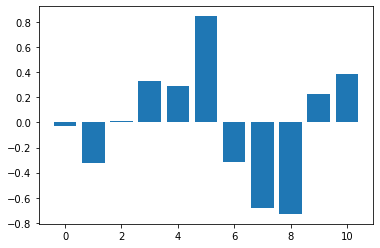

In [19]:
plt.bar([x for x in range(len(logistic_regression_model.coef_[0]))], logistic_regression_model.coef_[0])
#plt.savefig('images\logistic_regression_model.png')
plt.show()

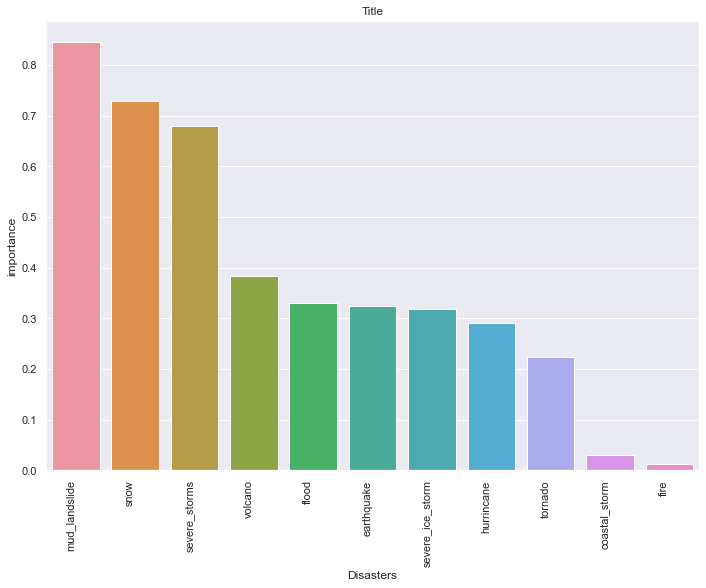

In [74]:
from matplotlib import pyplot
import seaborn as sns


a4_dims = (11.7, 8.27)

fig, ax = pyplot.subplots(figsize=a4_dims)
my_df = pd.DataFrame(importance.items())
my_df.columns=['feature', 'feature_importance']
ax = sns.barplot(x='feature', y='feature_importance', data=my_df, order=my_df.sort_values(by=['feature_importance'], inplace=True, ascending=False))
ax.set_xticklabels(ax.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
ax.set(xlabel = 'Disasters', ylabel='importance', title='Title')
plt.savefig('logistic_regression_name.png', bbox_inches='tight')

In [31]:
my_df

,feature,feature_importance
0,coastal_storm,0.030278
1,earthquake,0.325083
2,fire,0.011990
3,flood,0.330880
4,hurrincane,0.291126
5,mud_landslide,0.845040
6,severe_ice_storm,0.318772
7,severe_storms,0.679969
8,snow,0.728587
9,tornado,0.222650


In [ ]:
import seaborn as sns
sns.barplot(x=keys, y=values)

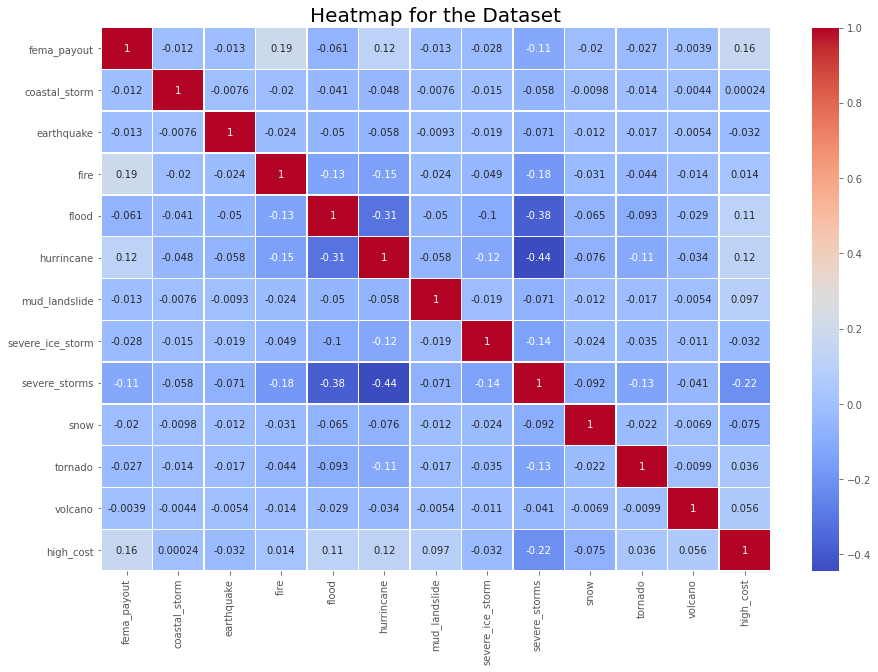

In [39]:

plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('ggplot')
sns.heatmap(incidentCost.corr(), annot = True, cmap = 'coolwarm', linewidths=0.5)
plt.title('Heatmap for the Dataset', fontsize = 20)
#plt.savefig('images\dataset_heatmap')
plt.show()

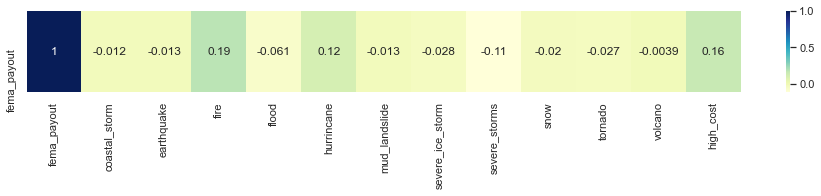

In [40]:
# Correlation with only target variables -- in this case its the AVG PRICE
sns.set(rc={'figure.figsize':(16,1.5)})
sns.heatmap(pd.DataFrame(pd.DataFrame(incidentCost.corr()).fema_payout).T,annot=True, cmap='YlGnBu')
plt.show()

In [41]:
target = incidentCost['high_cost']
target_names = ["low", "high"]

In [42]:
data = incidentCost.drop(['high_cost', 'fema_payout'], axis=1)
feature_names = data.columns
data.head()

,coastal_storm,earthquake,fire,flood,hurrincane,mud_landslide,severe_ice_storm,severe_storms,snow,tornado,volcano
0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0


In [43]:
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [44]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.5365853658536586

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.5365853658536586

In [46]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.39321218356005644, 'severe_storms'),
 (0.10566483912976946, 'hurrincane'),
 (0.09549481742197205, 'snow'),
 (0.09033307078184322, 'flood'),
 (0.07510165969274657, 'mud_landslide'),
 (0.0744544349305263, 'severe_ice_storm'),
 (0.05206205462020433, 'tornado'),
 (0.04045142635844044, 'fire'),
 (0.0274045653091424, 'earthquake'),
 (0.024303984377519086, 'volcano'),
 (0.021516963817779712, 'coastal_storm')]

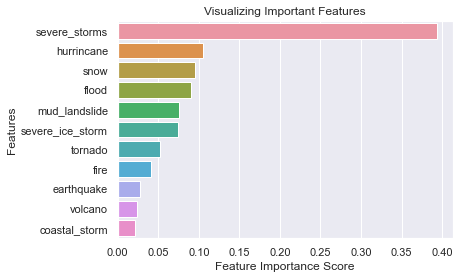

In [75]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances
feature_imp = pd.Series(rf.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
#plt.savefig('../app/images/important_features.png', bbox_inches='tight')
plt.show()